In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../data/processed/CO2_Emissions.csv',index_col='year',parse_dates=True)
df.index.freq = 'AS'

In [2]:
df1 = df['China']
df1 = df1.to_frame()
df1.head()

,China
year,
1990-01-01,2173.36
1991-01-01,2302.19
1992-01-01,2418.18
1993-01-01,2645.41
1994-01-01,2767.67


In [3]:

# Time series data
data = df1['China']

# Split the data into training and validation sets
train_size = int(len(data) * 0.8)
train_data, val_data = data[:train_size], data[train_size:]

# Define expanded parameter ranges
p_values = range(0, 10)  # AR order
d_values = range(0, 3)  # Differencing order
q_values = range(0, 10)  # MA order
P_values = range(0, 3)  # Seasonal AR order
D_values = range(0, 3)  # Seasonal differencing order
Q_values = range(0, 3)  # Seasonal MA order
s_values = [12, 24, 36]  # Seasonal period

# Perform model selection using auto_arima
best_model = None
best_mse = float('inf')

for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            try:
                                # Fit the SARIMA model
                                model = auto_arima(train_data, seasonal=True, m=s,
                                                   start_p=p, start_q=q,
                                                   max_p=None, max_q=None, max_order=None,
                                                   start_P=P, start_D=D, start_Q=Q,
                                                   maxiter=None, alpha=None,
                                                   suppress_warnings=True, stepwise=False,
                                                   random=True, random_state=42, n_fits=50)
                                # Forecast on the validation set
                                forecast = model.predict(n_periods=len(val_data))

                                # Calculate MSE
                                mse = mean_squared_error(val_data, forecast)

                                # Update the best model if the MSE improves
                                if mse < best_mse:
                                    best_mse = mse
                                    best_model = model
                            except:
                                continue

# Check if a best model was found
if best_model is None:
    print("No suitable model found.")
else:
    # Forecast with the best model
    forecast = best_model.predict(n_periods=len(val_data))

    # Print the best model parameters
    print("Best model parameters:")
    print(best_model.order)  # ARIMA order
    print(best_model.seasonal_order)  # Seasonal order

    # Calculate and print the MSE
    mse = mean_squared_error(val_data, forecast)
    print("Mean Squared Error (MSE):", mse)


No suitable model found.


In [4]:

# Fit SARIMA model
model = SARIMAX(data, order=(5, 3, 2), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79605D+00    |proj g|=  1.17483D+00

At iterate    5    f=  6.21021D+00    |proj g|=  2.12453D-02

At iterate   10    f=  6.20413D+00    |proj g|=  2.60645D-02

At iterate   15    f=  6.19739D+00    |proj g|=  4.48701D-03

At iterate   20    f=  6.19638D+00    |proj g|=  2.80134D-02

At iterate   25    f=  6.19073D+00    |proj g|=  2.22823D-02

At iterate   30    f=  6.18854D+00    |proj g|=  7.81500D-03

At iterate   35    f=  6.18704D+00    |proj g|=  1.65129D-02

At iterate   40    f=  6.18254D+00    |proj g|=  4.17668D-02

At iterate   45    f=  6.18107D+00    |proj g|=  1.19249D-02

At iterate   50    f=  6.18077D+00    |proj g|=  7.75964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [5]:
# Generate forecast
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)
 # Access forecast values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


<Figure size 1000x600 with 0 Axes>

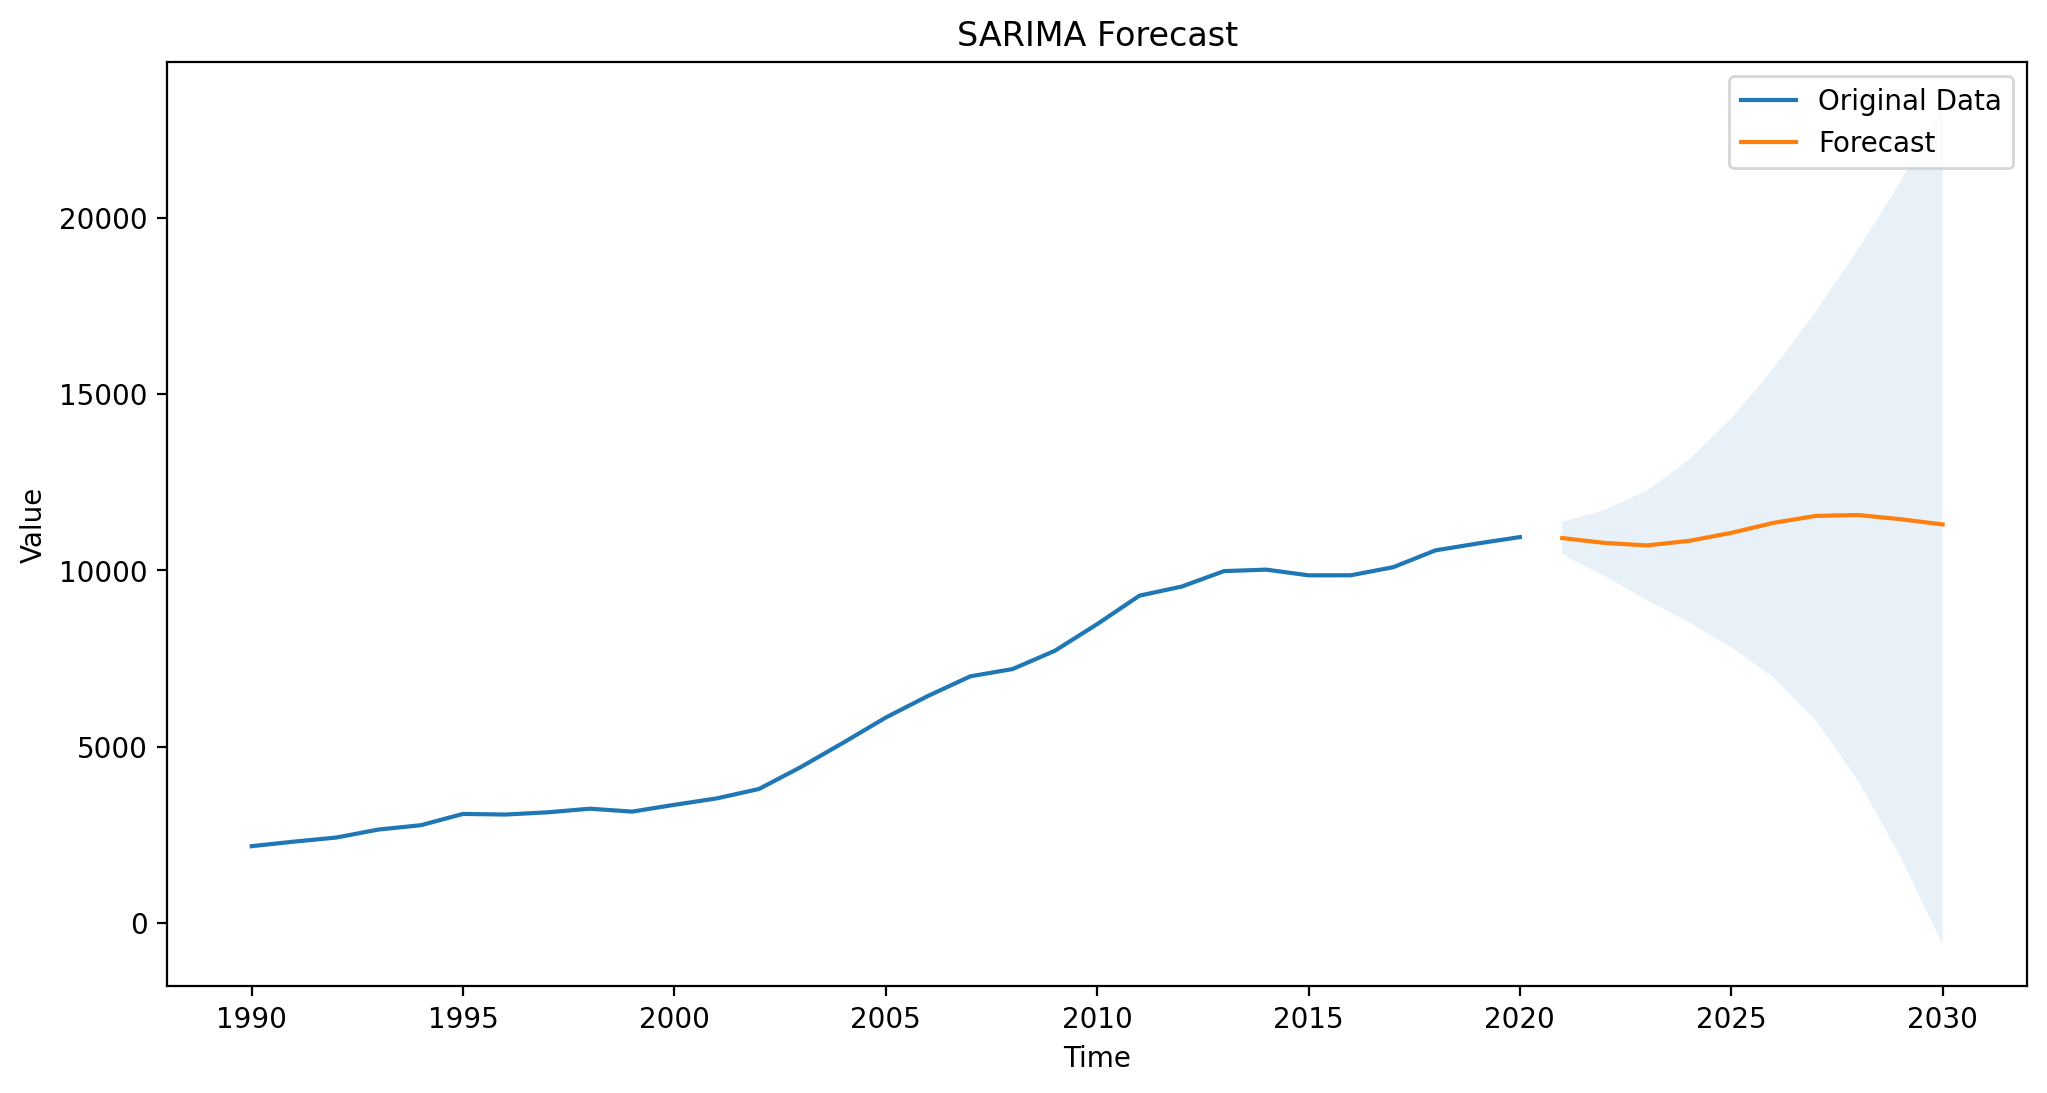

In [14]:
# Plotting the forecast
plt.figure(figsize=(10, 6))
fig = plt.figure(dpi=200, figsize=(12,6))
# Plot the original data
plt.plot(data, label='Original Data')
# Plot the forecasted values
plt.plot(forecast_values, label='Forecast')
# Plot the confidence intervals
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show(plt.gca())